In [3]:
import numpy as np

class LogisticRegression:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def _sigmoid(self, t):
        return 1. / (1. + np.exp(-t))
    
 
    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

       
        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return - np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
            except:
                return float('inf')
      
        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)

       
        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0
            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                cur_iter += 1
            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

   
    def predict_proba(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"

        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    def predict(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"
        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')

    def score(self, X_test, y_test):

        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "LogisticRegression()"

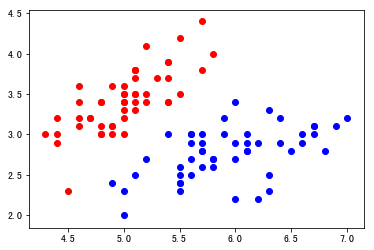

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [ ]:
from myAlgorithm.model_selection import train_test_split
from myAlgorithm.LogisticRegression import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

log_reg.predict_proba(X_test)
"""
输出：
array([ 0.92972035,  0.98664939,  0.14852024,  0.17601199,  0.0369836 ,
        0.0186637 ,  0.04936918,  0.99669244,  0.97993941,  0.74524655,
        0.04473194,  0.00339285,  0.26131273,  0.0369836 ,  0.84192923,
        0.79892262,  0.82890209,  0.32358166,  0.06535323,  0.20735334])
"""

# 得到逻辑回归分类结果
log_reg.predict(X_test)
"""
输出：
array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])
"""

In [ ]:
log_reg.predict_proba(X_test)
